# Model Evaluation and Analysis — Student Engagement Prediction

This notebook evaluates the saved Logistic Regression model.  
We'll visualize performance metrics and discuss how the model can be interpreted and improved.


In [6]:
import pandas as pd
import numpy as np
import joblib
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# Load model, scaler, and dataset
model = joblib.load("../models/engagement_model.pkl")
scaler = joblib.load("../models/scaler.pkl")
data = pd.read_csv("../data/raw/student_engagement.csv")

# Encode categorical features
from sklearn.preprocessing import LabelEncoder
data["class_start_time"] = LabelEncoder().fit_transform(data["class_start_time"])

X = data.drop(columns=["student_name", "engagement_level"])
y = data["engagement_level"]

X_scaled = scaler.transform(X)
y_pred = model.predict(X_scaled)


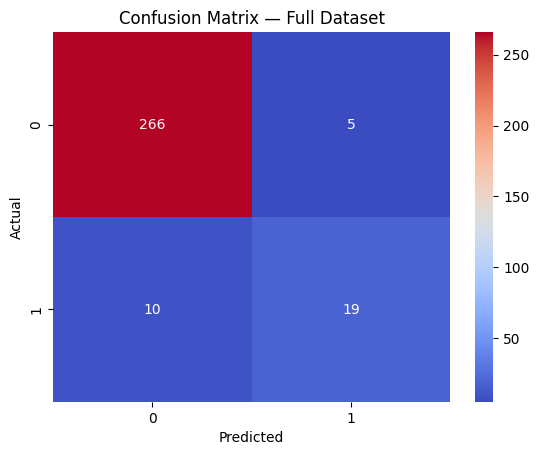

In [7]:
# Confusion matrix
cm = confusion_matrix(y, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix — Full Dataset")
plt.show()


In [8]:
# Classification report
print("Classification Report:")
print(classification_report(y, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       271
           1       0.79      0.66      0.72        29

    accuracy                           0.95       300
   macro avg       0.88      0.82      0.84       300
weighted avg       0.95      0.95      0.95       300



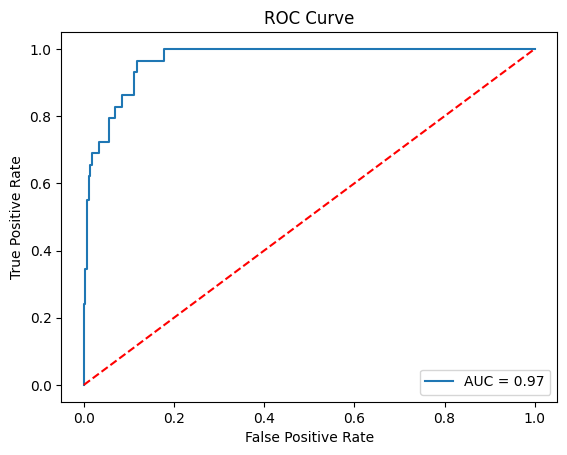

In [9]:
# ROC curve
y_pred_proba = model.predict_proba(X_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], "r--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


### ✅ Evaluation Summary

- The confusion matrix and classification report show how well the model distinguishes engaged vs. disengaged students.  
- ROC AUC demonstrates the model’s overall discrimination ability.  
- Further improvements could include:
  - Trying tree-based models (e.g., Random Forest, XGBoost).  
  - Feature selection or dimensionality reduction.  
  - Hyperparameter tuning for better precision/recall balance.
